In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Soru 1:
* Load the houseprices data from Kaggle.
* Reimplement your model from the previous lesson.
* Try OLS, Lasso, Ridge and ElasticNet regressions using the same model specification. This time, you need to do k-fold cross-validation to choose the best hyperparameter values for your models. Which model is the best? Why?

In [41]:
train=pd.read_csv("train.csv")


In [42]:
# Missing values çok fazla olduğu için direkt silebiliriz.

train.drop("LotFrontage",axis=1,inplace=True)
train.drop("Alley",axis=1,inplace=True)
train.drop("Id",axis=1,inplace=True)
train.drop("FireplaceQu",axis=1,inplace=True)
train.drop("PoolQC",axis=1,inplace=True)
train.drop("Fence",axis=1,inplace=True)
train.drop("MiscFeature",axis=1,inplace=True)

In [43]:
train["GarageCond"].fillna(train["GarageCond"].mode()[0],inplace=True)
train["MasVnrArea"].fillna(train["MasVnrArea"].mode()[0],inplace=True)
train["GarageQual"].fillna(train["GarageQual"].mode()[0], inplace=True)
train["GarageFinish"].fillna(train["GarageFinish"].mode()[0], inplace=True)
train["GarageYrBlt"].fillna(train["GarageYrBlt"].mode()[0], inplace=True)
train["GarageType"].fillna(train["GarageType"].mode()[0], inplace=True)
train["Electrical"].fillna(train["Electrical"].mode()[0], inplace=True)
train["BsmtFinType2"].fillna(train["BsmtFinType2"].mode()[0], inplace=True)
train["BsmtFinType1"].fillna(train["BsmtFinType1"].mode()[0], inplace=True)
train["BsmtQual"].fillna(train["BsmtQual"].mode()[0], inplace=True)
train["BsmtCond"].fillna(train["BsmtCond"].mode()[0], inplace=True)
train["BsmtExposure"].fillna(train["BsmtExposure"].mode()[0], inplace=True)
train["MasVnrType"].fillna(train["MasVnrType"].mode()[0], inplace=True)

In [44]:
train["MiscVal"].replace(0,"none",inplace=True)
train["PoolArea"].replace(0,"none",inplace=True)
train["ScreenPorch"].replace(0,"none",inplace=True)
train["3SsnPorch"].replace(0,"none",inplace=True)
train["EnclosedPorch"].replace(0,"none",inplace=True)
train["OpenPorchSF"].replace(0,"none",inplace=True)
train["WoodDeckSF"].replace(0,"none",inplace=True)
train["LowQualFinSF"].replace(0,"none",inplace=True)
train["BsmtFinSF2"].replace(0,"none",inplace=True)

In [45]:
def paved(PavedDrive):
    if PavedDrive=="Y":
        return 3
    elif PavedDrive=="P":
        return 2
    elif PavedDrive=="N":
        return 1

train["PavedDrive_new"]=train["PavedDrive"].apply(paved)

In [46]:
def garagequal(GarageQual):
    if GarageQual=="Ex":
        return 5
    elif GarageQual=="Gd":
        return 4
    elif GarageQual=="TA":
        return 3
    elif GarageQual=="Fa":
        return 2
    elif GarageQual=="Po":
        return 1
    
train["GarageQual_new"]=train["GarageQual"].apply(garagequal)

In [47]:
def garagefinish(GarageFinish):
    if GarageFinish=="Fin":
        return 3
    elif GarageFinish=="RFn":
        return 2
    elif GarageFinish=="Unf":
        return 1

train["GarageFinish_new"]=train["GarageFinish"].apply(garagefinish)

In [48]:
def kitchenqual(KitchenQual):
    if KitchenQual=="Ex":
        return 4
    elif KitchenQual=="Gd":
        return 3
    elif KitchenQual=="TA":
        return 2
    elif KitchenQual=="Fa":
        return 1

train["KitchenQual_new"]=train["KitchenQual"].apply(kitchenqual)

In [49]:
# dummy değişken oluşturma

train["CentralAir_new"]=train["CentralAir"].replace({"Y":1, "N":0})

In [50]:
def extercon(ExterCond):
    if ExterCond=="Ex":
        return 5
    elif ExterCond=="Gd":
        return 4
    elif ExterCond=="TA":
        return 3
    elif ExterCond=="Fa":
        return 2
    elif ExterCond=="Po":
        return 1
    
train["ExterCond_new"]=train["ExterCond"].apply(extercon)

In [51]:
train.head(3)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,YrSold,SaleType,SaleCondition,SalePrice,PavedDrive_new,GarageQual_new,GarageFinish_new,KitchenQual_new,CentralAir_new,ExterCond_new
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2008,WD,Normal,208500,3,3,2,3,1,3
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,2007,WD,Normal,181500,3,3,2,2,1,3
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2008,WD,Normal,223500,3,3,2,3,1,3


In [57]:
# Let's try first OLS regression model:

Y1=train["SalePrice"]
X1=train[["GarageArea","GrLivArea","OverallQual","OverallCond","GarageFinish_new","KitchenQual_new","TotalBsmtSF","BsmtUnfSF"]]


In [59]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.20, random_state=465)


In [61]:
lrm1=LinearRegression()
lrm1.fit(X1_train, Y1_train)

Y1_train_predict= lrm1.predict(X1_train)
Y1_test_predict=lrm1.predict(X1_test)

print("Number of observation in train set: {}". format(X1_train.shape[0]))
print("Number of observation in test set: {}". format(X1_test.shape[0]))

print("R-squared in train set: {}". format(lrm1.score(X1_train,Y1_train)))
print("R-squared in test set: {}". format(lrm1.score(X1_test,Y1_test)))

Number of observation in train set: 1168
Number of observation in test set: 292
R-squared in train set: 0.7811453558103012
R-squared in test set: 0.8013059132864163


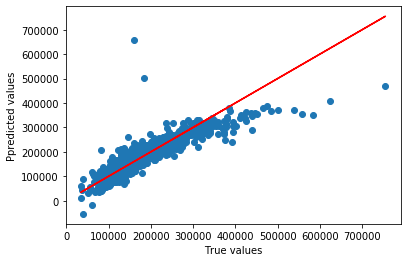

In [67]:
plt.scatter(Y1_train,Y1_train_predict)
plt.xlabel("True values")
plt.ylabel("Ppredicted values")
plt.plot(Y1_train,Y1_train, c="r");

In [70]:
# Let's try Ridge regression model:

Y2=train["SalePrice"]
X2=train[["GarageArea","GrLivArea","OverallQual","OverallCond","GarageFinish_new","KitchenQual_new","TotalBsmtSF","BsmtUnfSF"]]

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.20, random_state=465)


In [69]:
from sklearn.linear_model import Ridge

In [71]:
ridge_reg=Ridge(alpha=10**37)
ridge_reg.fit(X2_train, Y2_train)

Y2_train_predict=ridge_reg.predict(X2_train)
Y2_test_predict=ridge_reg.predict(X2_test)

In [72]:
print("Number of observation in train set: {}". format(X2_train.shape[0]))
print("Number of observation in test set: {}". format(X2_test.shape[0]))

print("R-squared in train set: {}". format(ridge_reg.score(X2_train,Y2_train)))
print("R-squared in test set: {}". format(ridge_reg.score(X2_test,Y2_test)))


Number of observation in train set: 1168
Number of observation in test set: 292
R-squared in train set: 0.0
R-squared in test set: -0.0019389852335491842


In [74]:
# Let's try Lasso regression:

Y3=train["SalePrice"]
X3=train[["GarageArea","GrLivArea","OverallQual","OverallCond","GarageFinish_new","KitchenQual_new","TotalBsmtSF","BsmtUnfSF"]]

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.20, random_state=465)


In [75]:
from sklearn.linear_model import Lasso

In [77]:
lasso_reg=Lasso(alpha=10**20.5)
lasso_reg.fit(X3_train,Y3_train)

Y3_train_predict=lasso_reg.predict(X3_train)
Y3_test_predict=lasso_reg.predict(X3_train)

print("Number of observation in train set: {}". format(X3_train.shape[0]))
print("Number of observation in test set: {}". format(X3_test.shape[0]))
print("R-squared in train test: {}". format(lasso_reg.score(X3_train,Y3_train)))
print("R-squared in test set: {}". format(lasso_reg.score(X3_test, Y3_test)))

Number of observation in train set: 1168
Number of observation in test set: 292
R-squared in train test: 0.0
R-squared in test set: -0.0019389852335491842


Sonuçları yorumlarsak; ilk modelde train setindeki R-squared değeri ile test setindeki R-squared değeri arasındaki fark çok az olmakla birlikte overfit değildir diye düşünebiliriz; ridge ve lasso yu uyguladığımızda hem train hem de test setindeki model performansı düşmüştür, o yüzden ev satış fiyatları veri kümesinde lineer regresyonun uygulanması bence daha uygun olacaktır.